In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from astropy import units as u

import pulsar

![Duty Cycles of Pulsars](dutycycle.png)

source https://www.nature.com/articles/2241188a0

## Brightness time series

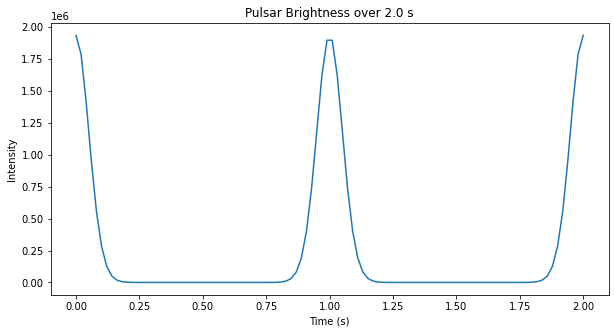

In [89]:
# Global settings for plot size
plt.rcParams["figure.figsize"] = (10, 5)

# Pulsar scenario constants
D = 0.1             # duty cycle number
phi0 = 1 * u.rad    # initial angle value
Ipeak = 100         # amplitude of intensity
period = 0.01 * u.s # rotational period (10 ms)


# Plotting a 2s time frame
time = 2 * u.s
tframe = np.linspace(0, time.value, 100) * u.s

intensity = pulsar.linear_intensity(Ipeak, phi0, D, period, tframe)

plt.plot(tframe, intensity)
plt.title(f'Pulsar Brightness over {time}')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.show()

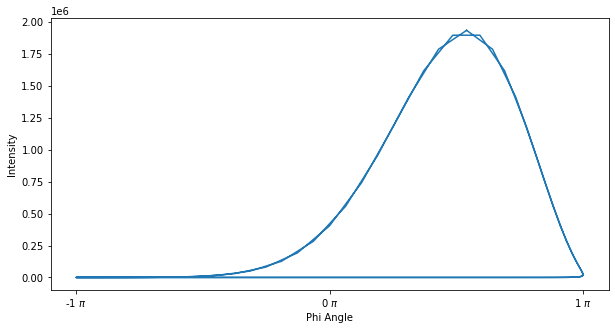

In [90]:
def cos_displacement(t: u.s) -> float:
    return np.cos(pulsar.angle(phi0, period, t).value)

displacement = np.apply_along_axis(cos_displacement, 0, tframe)
f, ax = plt.subplots()
plt.plot(displacement, intensity)
plt.xlabel('Phi Angle')
plt.ylabel('Intensity')
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
plt.show()

## Integrated Brightness

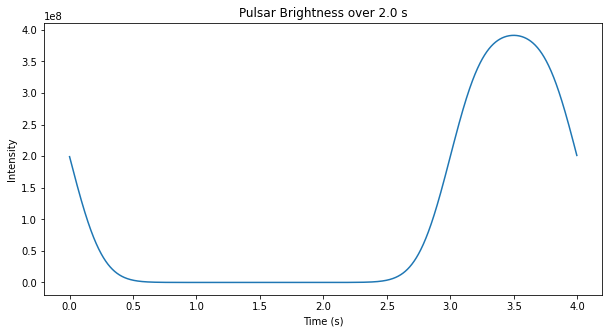

In [91]:
# Integrate the brigthness over 4s (2x the previous graphs) with a time step
# of 2.5ms
ts = 0.0025 * u.s # 2.5ms
steps = np.arange(0, 2*time.value, ts.value)

intensity = pulsar.integrated_intensity(Ipeak, phi0, D, period, ts, steps)

plt.plot(steps, intensity)
plt.title(f'Pulsar Brightness over {2*time}')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.show()